<h3>Simple Linear Regression </h3>

<p> The code in this notebook is implementing a simple linear regression model using PyTorch and Numpy with a dataset generated using the NumPy module.</p>

In [10]:
# importing the neccessary packages 
import numpy as np 
import torch 
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt 

<p>Implementing Linear Model in Numpy </p>

In [8]:
# Implementing Linear Model in Numpy 
# 1. GENERATE THE DATATSET 
# I am going to generate a datatset in which X(train_input) contains random numbers and Y(train_output) is 10 times of X 
def get_train_data(num_of_data = 10000):
    X = np.arange(0,num_of_data)
    np.random.shuffle(X)
    #Normalizing the input in the range of 0 to 1 
    X = X / num_of_data
    Y = X * 10 
    return X,Y

train_input,train_output = get_train_data()
print("X : {} : Y : {}".format(train_input[0],train_output[0]))
print("SHAPE OF TRAIN INPUT : ",(train_input).shape)
print("SHAPE OF TRAIN OUTPUT : ",(train_output).shape)


X : 0.9812 : Y : 9.812
SHAPE OF TRAIN INPUT :  (10000,)
SHAPE OF TRAIN OUTPUT :  (10000,)


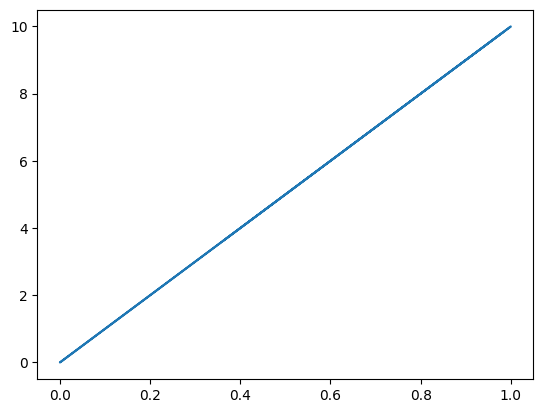

In [11]:
# Visulazing the data 
plt.plot(train_input,train_output)

In [14]:
#initalizing only W
# since y is directly proportional to x we do not require to initalize c 

def initalize_weights():
    np.random.seed(0)
    params = {}
    params["w"] = np.array((np.random.randn())).reshape(1,1)
    return params 

params = initalize_weights()
print("INITAL PARAMETERS : ",params)

INITAL PARAMETERS :  {'w': array([[1.76405235]])}


In [16]:
#forward pass : predicting the value of y with learnable parameter w 
def forward_pass(X,params):
    Y_pred = X*params['w'] 
    return Y_pred 

In [17]:

# Function to find the loss of the predicted and the ground truth value
# Here i am using MSE loss 
# Loss tells how good our model is perfroming
def cost_function(Y_pred,Y):
    cost = np.mean((Y_pred-Y)**2)
    return cost 

In [18]:
"""Backpropagate : In which  the  adjustment is carried out to minimize the loss, which is a measure of how well the model's predictions match 
the actual target values. The ultimate goal of this optimization process is to make the model's predictions as close as possible to the 
true, desired results. """
def back_prop(X,Y,Y_pred):
    dW = -2*(np.multiply(X,(Y-Y_pred)))
    dW = np.mean(dW) 
    return dW 



In [19]:
def update_params(params,lr,dW):
    params['w'] = params['w'] - (lr*dW)
    return params 

In [26]:
# training 
train_input,train_output = get_train_data()
lr = 0.001 
params = initalize_weights()
epochs = 100000 
loss_list = []
for epoch in range(epochs):
    y_pred = forward_pass(train_input,params)
    loss = cost_function(y_pred,train_output)
    gradinet = back_prop(train_input,train_output,y_pred)
    params = update_params(params,lr,gradinet)
    loss_list.append(loss)
    print(f"\r EPOCH[{epoch}] LOSS: {loss}",end=" ")

 EPOCH[99999] LOSS: 5.915573441148635e-25  

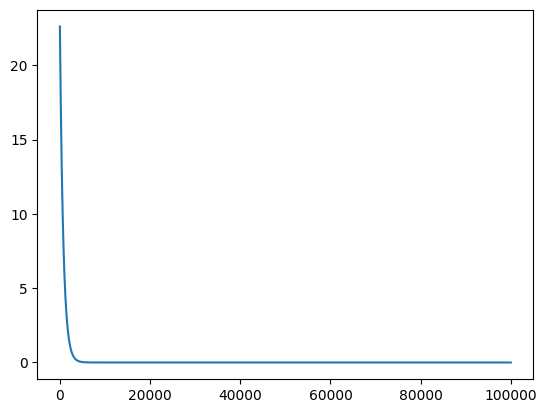

In [27]:
# Visulaize loss 
"""Loss decreses..... hurray !!!!"""
plt.plot(loss_list)


In [44]:
"""Lets check the weights with random numbers"""

test_num = np.random.randint(0,100000)
W = params['w']
predicted = (test_num * W)[0][0]
print("ACTUAL {} PREDICTED {:.5f}".format(test_num*10,predicted))


ACTUAL 896880 PREDICTED 896880.00000


In [45]:
# ADDITIONAL ATTACHED THE PYTORCH IMPLEMENTATION OF THE ABOVE LINEAR REGRESSION 

In [46]:
from torch.utils.data import Dataset , DataLoader 
from torch import nn,optim

torch.random.manual_seed(1)
class MultiplierDataset(Dataset):
    def __init__(self) :
        super().__init__()
        self.x = torch.arange(0,10000,dtype=torch.float)
        self.x = (self.x)/10000
        self.y = self.x * 10 
    def __getitem__(self, index) :
        return self.x[index],self.y[index]

    def __len__(self):
        return len(self.x)

   

In [47]:
datatset = MultiplierDataset()
loader = DataLoader( dataset=datatset,
                    batch_size=16,
                    shuffle=True,
                    num_workers=2
                    )
model = nn.Linear(1,1,bias=False)
optimizer = optim.SGD(model.parameters(),lr=0.001)
loss_func = nn.MSELoss()
epochs = 20
for epoch in range(epochs):
    step = 0
    epoch_loss = 0.0
    for x,y in loader:
        optimizer.zero_grad()
        x = x.reshape(-1,1)
        y = y.reshape(-1,1)
        y_pred = model(x) 
        loss = loss_func(y_pred,y)
        epoch_loss = loss.item()
        loss.backward()
        optimizer.step()
        if not step%100:
            print(f"EPOCH[{epoch}][{step}/{len(loader)}] LOSS : {loss}")
        step+=1
    print(f"EPOCH[{epoch}]  LOSS : {loss}")


EPOCH[0][0/625] LOSS : 22.270694732666016
EPOCH[0][100/625] LOSS : 24.65580177307129
EPOCH[0][200/625] LOSS : 18.091222763061523
EPOCH[0][300/625] LOSS : 24.222902297973633
EPOCH[0][400/625] LOSS : 18.653064727783203
EPOCH[0][500/625] LOSS : 15.602093696594238
EPOCH[0][600/625] LOSS : 17.692237854003906
EPOCH[0]  LOSS : 9.09078598022461
EPOCH[1][0/625] LOSS : 14.135516166687012
EPOCH[1][100/625] LOSS : 15.61559772491455
EPOCH[1][200/625] LOSS : 9.307182312011719
EPOCH[1][300/625] LOSS : 7.967706203460693
EPOCH[1][400/625] LOSS : 4.186809539794922
EPOCH[1][500/625] LOSS : 5.2093353271484375
EPOCH[1][600/625] LOSS : 5.1238837242126465
EPOCH[1]  LOSS : 6.406209945678711
EPOCH[2][0/625] LOSS : 6.176841735839844
EPOCH[2][100/625] LOSS : 6.4993977546691895
EPOCH[2][200/625] LOSS : 1.988037109375
EPOCH[2][300/625] LOSS : 3.707643985748291
EPOCH[2][400/625] LOSS : 1.8618160486221313
EPOCH[2][500/625] LOSS : 2.1052167415618896
EPOCH[2][600/625] LOSS : 2.0850753784179688
EPOCH[2]  LOSS : 2.39973

In [48]:
test_num = torch.randint(3, 5, (3,),dtype=torch.float)
print("TEST NUM : " ,test_num)
pred = model(test_num.view(-1,1))
print("PREDTICTED : ",pred,"ACTUAL ANSWER : ",test_num*10)

TEST NUM :  tensor([3., 3., 4.])
PREDTICTED :  tensor([[29.9932],
        [29.9932],
        [39.9909]], grad_fn=<MmBackward0>) ACTUAL ANSWER :  tensor([30., 30., 40.])
